# Aim: To plot Feature importance using SHAP Value

## Data is of the 9 important features of the combined data

In [1]:
import shap
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap

%cd Z:\PPMI_Data\Excels\NonMotors\The251\Files

Z:\PPMI_Data\Excels\NonMotors\The251\Files


In [2]:
# Load data
df = pd.read_csv('Any2Common_CategAge_APPRDX_Gender.csv')
df = df[df['Gender'] == 2]
df = df.drop(['PATNO', 'Age', 'HYS', 'Gender'], axis = 1)
df['APPRDX'] = df['APPRDX'] - 1
print(df.shape)
df.head(2)

(84, 10)


,APPRDX,MDSP_Fatigue,MDS_Apathy,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
5,0,1,0,0,2,1,1,0,0,2
9,0,1,1,0,2,1,0,0,1,1


In [3]:
# Define Features and Target
X = df.drop(columns=["APPRDX"])  # Drop target column
y = df["APPRDX"]  # Target: HYS column

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost multiclass classifier
xgb_model = XGBClassifier(n_estimators = 1000, max_depth = 10, learning_rate = 0.001, random_state = 1)
xgb_model.fit(X_train, y_train)


# Compute SHAP values
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

In [4]:
# Calculate mean absolute SHAP value for each feature (like summary_plot bar)
feature_importance = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'MeanAbsSHAP': feature_importance
})

# Sort by importance (optional)
importance_df = importance_df.sort_values(by='MeanAbsSHAP', ascending=False)

# Save to CSV
importance_df.to_csv('SHAP_Feature_Importance_Female.csv', index=False)

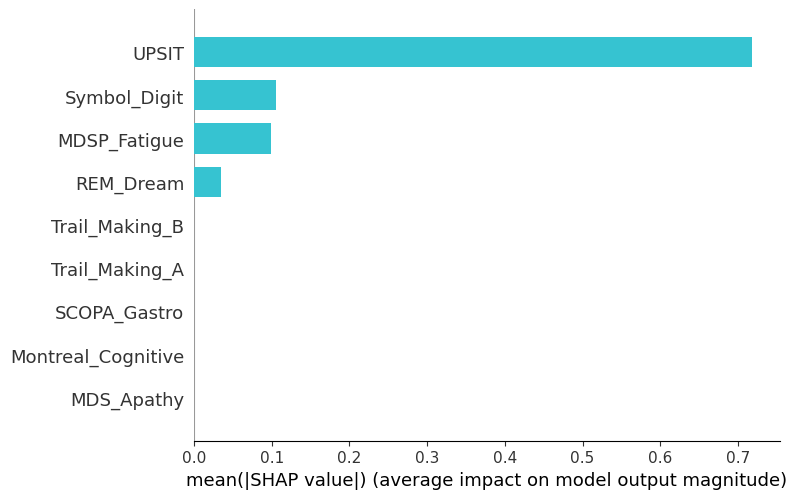

In [5]:
# Plot SHAP summary plot for all classes
shap.summary_plot(shap_values, X_train, plot_type = "bar", color='#36C3D1')

In [5]:
# Create the SHAP plot and save
plt.figure(figsize=(12, 6))  # Optional: Set figure size for better proportions
shap.summary_plot(shap_values, X_train, plot_type = "bar", color='#36C3D1', show = False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('SHAP_FeatureImp_9_Impfeat_Female.svg', format='svg')
plt.savefig('SHAP_FeatureImp_9_Impfeat_Female.pdf', format='pdf')
plt.close()